In [2]:
# Import libraries

import sympy as sp
from sympy import init_printing
from sympy import pprint
import numpy as np
import math
# Problem 1

theta1 = sp.symbols('theta1')
theta2 = sp.symbols('theta2')
theta3 = sp.symbols('theta3')
theta4 = sp.symbols('theta4')

# DH Transformation Matrix

def dh_matrix(theta, d, a, alpha):
    """
    Standard DH:
    A = Rot_z(theta) * Trans_z(d) * Trans_x(a) * Rot_x(alpha)
    """
    ct = sp.cos(theta)
    st = sp.sin(theta)
    ca = sp.cos(alpha)
    sa = sp.sin(alpha)

    return sp.Matrix([
        [ct, -st * ca,  st * sa, a * ct],
        [st,  ct * ca, -ct * sa, a * st],
        [0,      sa,      ca,     d],
        [0,      0,       0,      1]
    ])

# Calculate A1 to A 4

a1 = dh_matrix(theta1, 50, 0, sp.pi/2)
a2 = dh_matrix(theta2, 0, 93, 0)
a3 = dh_matrix(theta3, 0, 93, 0)
a4 = dh_matrix(theta4, 0, 50, 0)
print(f'A1: {a1}')
print(f'A2: {a2}')
print(f'A3: {a3}')
print(f'A4: {a4}')

a5 = sp.Matrix([[1, 0, 0, -15], [0, 1, 0, 45], [0, 0, 1, 0], [0, 0, 0, 1]])
init_printing(a4)

A1: Matrix([[cos(theta1), 0, sin(theta1), 0], [sin(theta1), 0, -cos(theta1), 0], [0, 1, 0, 50], [0, 0, 0, 1]])
A2: Matrix([[cos(theta2), -sin(theta2), 0, 93*cos(theta2)], [sin(theta2), cos(theta2), 0, 93*sin(theta2)], [0, 0, 1, 0], [0, 0, 0, 1]])
A3: Matrix([[cos(theta3), -sin(theta3), 0, 93*cos(theta3)], [sin(theta3), cos(theta3), 0, 93*sin(theta3)], [0, 0, 1, 0], [0, 0, 0, 1]])
A4: Matrix([[cos(theta4), -sin(theta4), 0, 50*cos(theta4)], [sin(theta4), cos(theta4), 0, 50*sin(theta4)], [0, 0, 1, 0], [0, 0, 0, 1]])


In [3]:
# Multiply to get T0_4
t0_4 = a1 * a2 * a3 * a4


t0_5 = t0_4 * a5
# print(f'T0_4: {t0_4}')
# print(f'T0_5: {t0_5}')
T04_simpl = sp.simplify(sp.trigsimp(t0_4, recursive=True))
T05_simpl = sp.simplify(sp.trigsimp(t0_5, recursive=True))
print("T4:")
sp.pprint(T04_simpl)
print("T5:")
sp.pprint(T05_simpl)

T4:
⎡cos(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  -sin(θ₂ + θ₃ + θ₄)⋅cos(θ₁)  sin(θ₁)   (93⋅cos(θ₂)  ↪
⎢                                                                              ↪
⎢sin(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  -sin(θ₁)⋅sin(θ₂ + θ₃ + θ₄)  -cos(θ₁)  (93⋅cos(θ₂)  ↪
⎢                                                                              ↪
⎢    sin(θ₂ + θ₃ + θ₄)          cos(θ₂ + θ₃ + θ₄)          0        93⋅sin(θ₂) ↪
⎢                                                                              ↪
⎣            0                          0                  0                   ↪

↪ + 93⋅cos(θ₂ + θ₃) + 50⋅cos(θ₂ + θ₃ + θ₄))⋅cos(θ₁)⎤
↪                                                  ⎥
↪ + 93⋅cos(θ₂ + θ₃) + 50⋅cos(θ₂ + θ₃ + θ₄))⋅sin(θ₁)⎥
↪                                                  ⎥
↪  + 93⋅sin(θ₂ + θ₃) + 50⋅sin(θ₂ + θ₃ + θ₄) + 50   ⎥
↪                                                  ⎥
↪                   1                              ⎦
T5:
⎡cos(θ₁)⋅cos(θ₂ + θ₃ + θ₄)  -sin(θ₂ + θ₃ + θ₄)⋅cos(θ₁

In [4]:
print("Last column of T4:")
sp.pprint(T04_simpl[:, 3])
print("Last column of T5:")
sp.pprint(T05_simpl[:, 3])

Last column of T4:
⎡(93⋅cos(θ₂) + 93⋅cos(θ₂ + θ₃) + 50⋅cos(θ₂ + θ₃ + θ₄))⋅cos(θ₁)⎤
⎢                                                             ⎥
⎢(93⋅cos(θ₂) + 93⋅cos(θ₂ + θ₃) + 50⋅cos(θ₂ + θ₃ + θ₄))⋅sin(θ₁)⎥
⎢                                                             ⎥
⎢  93⋅sin(θ₂) + 93⋅sin(θ₂ + θ₃) + 50⋅sin(θ₂ + θ₃ + θ₄) + 50   ⎥
⎢                                                             ⎥
⎣                              1                              ⎦
Last column of T5:
⎡(-45⋅sin(θ₂ + θ₃ + θ₄) + 93⋅cos(θ₂) + 93⋅cos(θ₂ + θ₃) + 35⋅cos(θ₂ + θ₃ + θ₄)) ↪
⎢                                                                              ↪
⎢(-45⋅sin(θ₂ + θ₃ + θ₄) + 93⋅cos(θ₂) + 93⋅cos(θ₂ + θ₃) + 35⋅cos(θ₂ + θ₃ + θ₄)) ↪
⎢                                                                              ↪
⎢   93⋅sin(θ₂) + 93⋅sin(θ₂ + θ₃) + 35⋅sin(θ₂ + θ₃ + θ₄) + 45⋅cos(θ₂ + θ₃ + θ₄) ↪
⎢                                                                              ↪
⎣                           

In [5]:
# Problem 2

# x4 = T04_simpl[:3,0]
# o4 = T04_simpl[:3,3]

x4 = t0_4[:3, 0]
o4 = t0_4[:3, 3]

o4x = o4[0, 0]
o4y = o4[1, 0]
o4z = o4[2, 0]
# Find q1-q4


In [6]:
# import numpy as np

# def inverse_kinematics(o4x, o4y, o4z, x4z_des=0.0):
#     # --- robot constants (mm) ---
#     L1 = 50.0
#     L2 = 93.0
#     L3 = 93.0
#     L4 = 50.0

#     # 1) base joint
#     q1 = np.arctan2(o4y, o4x)
#     rho = np.hypot(o4x, o4y)

#     # 2) orientation scalar (only last component of x4^0)
#     x4z_des = float(np.clip(x4z_des, -1.0, 1.0))
#     S_candidates = [np.arcsin(x4z_des), np.pi - np.arcsin(x4z_des)]

#     sols = []

#     for S in S_candidates:
#         # 3) subtract link-4 contribution
#         rho_p = rho - L4 * np.cos(S)
#         z_p = (o4z - L1) - L4 * np.sin(S)

#         # 4) 2R IK for q2, q3
#         num = rho_p**2 + z_p**2 - L2**2 - L3**2
#         den = 2 * L2 * L3
#         c3 = num / den

#         if abs(c3) > 1.0:
#             # this S makes the point unreachable, skip
#             continue

#         s3_pos = np.sqrt(1.0 - c3**2)

#         for s3 in (s3_pos, -s3_pos):  # elbow up / elbow down
#             q3 = np.arctan2(s3, c3)

#             q2 = np.arctan2(z_p, rho_p) - np.arctan2(
#                 L3 * np.sin(q3),
#                 L2 + L3 * np.cos(q3)
#             )

#             # 5) recover q4 from S = q2 + q3 + q4
#             q4 = S - (q2 + q3)

#             sols.append(np.array([q1, q2, q3, q4]))

#     return sols

L1 = 50.0   # base offset  (d1)
L2 = 93.0   # link 2 length (a2)
L3 = 93.0   # link 3 length (a3)
L4 = 50.0   # link 4 length (a4)

def inverse_kinematics(o4x, o4y, o4z, x4z_des=0.0, tol=1e-9):
    """
    IK for your DH chain:
        A1 = DH(q1, 50, 0, pi/2)
        A2 = DH(q2, 0, 93, 0)
        A3 = DH(q3, 0, 93, 0)
        A4 = DH(q4, 0, 50, 0)
    Find all (q1,q2,q3,q4) such that:
        position = (o4x, o4y, o4z)
        and (x4^0)_z = x4z_des
    Returns a list of numpy arrays, possibly empty.
    """

    # 1) base joint from xy
    q1 = math.atan2(o4y, o4x)
    rho = math.hypot(o4x, o4y)   # horizontal distance

    # 2) orientation scalar: (x4^0)_z = sin(S)
    x4z_des = float(np.clip(x4z_des, -1.0, 1.0))
    S0 = math.asin(x4z_des)
    # two possible totals for S = q2+q3+q4
    S_candidates = (S0, math.pi - S0)

    sols = []

    for S in S_candidates:
        # 3) subtract the last link (50 mm) that is rotated by S
        # original point, seen from joint-2 plane:
        #   rho  = 93 cos q2 + 93 cos(q2+q3) + 50 cos S
        #   z    = 50 + 93 sin q2 + 93 sin(q2+q3) + 50 sin S
        # so after subtraction we get the pure 2R part:
        rho_p = rho - L4 * math.cos(S)
        z_p   = (o4z - L1) - L4 * math.sin(S)

        # 4) planar 2R IK for links L2, L3
        num = rho_p**2 + z_p**2 - L2**2 - L3**2
        den = 2.0 * L2 * L3
        if abs(den) < tol:
            continue  # degenerate, shouldn't happen here

        c3 = num / den

        # reachability with tolerance
        if c3 < -1.0 - 1e-6 or c3 > 1.0 + 1e-6:
            # this S doesn't make the point reachable
            continue

        c3 = max(min(c3, 1.0), -1.0)     # clamp
        s3_abs = math.sqrt(max(0.0, 1.0 - c3**2))

        # two elbow configurations
        for s3 in (s3_abs, -s3_abs):
            q3 = math.atan2(s3, c3)

            # shoulder (standard 2R formula)
            q2 = math.atan2(z_p, rho_p) - math.atan2(
                L3 * math.sin(q3),
                L2 + L3 * math.cos(q3)
            )

            # 5) recover q4 from S = q2 + q3 + q4
            q4 = S - (q2 + q3)

            sols.append(np.array([q1, q2, q3, q4], dtype=float))

    return sols


In [7]:
# Problem 3

R = 32  # radius
pc = np.array([150, 0, 120])  # mm

configs = []

for j in range(37):
    phi = 2*np.pi*j/36

    o4x = pc[0] + 0
    o4y = pc[1] + R*np.cos(phi)
    o4z = pc[2] + R*np.sin(phi)

    configs.append(inverse_kinematics(o4x, o4y, o4z))

# for i in configs:
#     print(i)
print(configs[0])

[array([ 0.21018259, -0.23973022,  1.66990262, -1.4301724 ]), array([ 0.21018259,  1.4301724 , -1.66990262,  0.23973022])]


In [8]:
def forward_kinematics(forward_matrix, thetas):
    return forward_matrix.subs({theta1: thetas[0], theta2: thetas[1], theta3: thetas[2], theta4: thetas[3]})


In [9]:
# TEST CONFIGS
num_failed = 0
num_correct = 0
for j, conf in enumerate(configs):
    conf = conf[0]
    phi = 2*np.pi*j/36
    o4x = pc[0] + 0
    o4y = pc[1] + R*np.cos(phi)
    o4z = pc[2] + R*np.sin(phi)
    T = forward_kinematics(t0_4, conf)
    o4_forward = T[:3, 3]
    o4_forward = o4_forward.T.tolist()[0]
    
    # Check if config gives correct o4 after forward kin
    o4_desired = [float(o4x), float(o4y), float(o4z)]
    print(o4_forward, o4_desired)
    if np.isclose(o4_forward, o4_desired).all():
        num_correct += 1
    else:
        num_failed += 1
        
if num_correct != len(configs):
    print("TEST FAILED")
    print(f"Correct reprojections: {num_correct}, Failed reporojections: {num_failed}")
else:
    print("TEST PASSED")


[150.000000000000, 32.0000000000000, 120.000000000000] [150.0, 32.0, 120.0]
[150.000000000000, 31.5138480963907, 125.556741685342] [150.0, 31.513848096390657, 125.55674168534178]
[150.000000000000, 30.0701638651491, 130.944644586421] [150.0, 30.07016386514907, 130.9446445864214]
[150.000000000000, 27.7128129211020, 136.000000000000] [150.0, 27.71281292110204, 136.0]
[150.000000000000, 24.5134221798073, 140.569203509969] [150.0, 24.513422179807296, 140.56920350996927]
[150.000000000000, 20.5692035099693, 144.513422179807] [150.0, 20.56920350996926, 144.5134221798073]
[150.000000000000, 16.0000000000000, 147.712812921102] [150.0, 16.000000000000004, 147.71281292110203]
[150.000000000000, 10.9446445864214, 150.070163865149] [150.0, 10.944644586421402, 150.07016386514906]
[150.000000000000, 5.55674168534177, 151.513848096391] [150.0, 5.556741685341773, 151.51384809639066]
[150.000000000000, 1.95943487863577e-15, 152.000000000000] [150.0, 1.959434878635765e-15, 152.0]
[150.000000000000, -5.

In [10]:
def compute_geometric_jacobian(T_list, frame_index=4):
    o_n = np.array(T_list[frame_index][:3, 3], dtype=float)
    J   = np.zeros((6, 4), dtype=float)

    for i in range(1, 5):  # joints 1..4
        o_im1 = np.array(T_list[i-1][:3, 3], dtype=float)   # origin of frame {i-1}
        z_im1 = np.array(T_list[i-1][:3, 2], dtype=float)   # z-axis of frame {i-1} in base
# 
        J[:3, i-1] = np.cross(z_im1, (o_n - o_im1))         # linear
        J[3:, i-1] = z_im1                                  # angular
    return J

In [11]:
# Calcolates T0-T1-T2-T3-T4-T5 with q configuration
def forward_kin_numeric(q):

    # Converts matrices sympy in numpy 
    subs = {theta1:q[0], theta2:q[1], theta3:q[2], theta4:q[3]}
    A1n = np.array(a1.evalf(subs=subs)).astype(np.float64)
    A2n = np.array(a2.evalf(subs=subs)).astype(np.float64)
    A3n = np.array(a3.evalf(subs=subs)).astype(np.float64)
    A4n = np.array(a4.evalf(subs=subs)).astype(np.float64)
    A5n = np.array(a5.evalf(subs=subs)).astype(np.float64)

    T0 = np.eye(4)
    T1 = A1n
    T2 = T1 @ A2n
    T3 = T2 @ A3n
    T4 = T3 @ A4n
    T5 = T4 @ A5n
    return [T0, T1, T2, T3, T4, T5]

# Same process as Problem 3 with only 4 different phi values + Jacobian
phis = [0, np.pi/2, np.pi, 3*np.pi/2]
R = 32
pc = np.array([150, 0, 120])

for phi in phis:
    o4x = pc[0]
    o4y = pc[1] + R*np.cos(phi)
    o4z = pc[2] + R*np.sin(phi)
    q = np.array(inverse_kinematics(o4x, o4y, o4z), dtype=float)[0]

    T_list = forward_kin_numeric(q)
    J_stylus = compute_geometric_jacobian(T_list, frame_index=4)
    J_camera = compute_geometric_jacobian(T_list, frame_index=5)

    print(f"\nφ = {phi:.2f} rad ")
    print("q =", np.round(q, 4))
    print("Jacobian Stylus:\n", np.round(J_stylus, 3))
    print("Jacobian Camera:\n", np.round(J_camera, 3))



φ = 0.00 rad 
q = [ 0.2102 -0.2397  1.6699 -1.4302]
Jacobian Stylus:
 [[-32.    -68.459 -90.056  -0.   ]
 [150.    -14.605 -19.212   0.   ]
 [  0.    153.375  63.035  50.   ]
 [  0.      0.209   0.209   0.209]
 [  0.     -0.978  -0.978  -0.978]
 [  1.      0.      0.      0.   ]]
Jacobian Camera:
 [[ -28.87  -112.469 -134.065  -44.01 ]
 [ 135.33   -23.993  -28.601   -9.389]
 [   0.     138.375   48.035   35.   ]
 [   0.       0.209    0.209    0.209]
 [   0.      -0.978   -0.978   -0.978]
 [   1.       0.       0.       0.   ]]

φ = 1.57 rad 
q = [ 0.      0.1002  1.3903 -1.4904]
Jacobian Stylus:
 [[  -0.    -102.     -92.7     -0.   ]
 [ 150.      -0.      -0.       0.   ]
 [   0.     150.      57.466   50.   ]
 [   0.       0.       0.       0.   ]
 [   0.      -1.      -1.      -1.   ]
 [   1.       0.       0.       0.   ]]
Jacobian Camera:
 [[  -0.    -147.    -137.7    -45.   ]
 [ 135.      -0.      -0.      -0.   ]
 [   0.     135.      42.466   35.   ]
 [   0.       0.       0

In [12]:
import sympy as sp
import numpy as np
import math


print("--- Starting Problem 5 ---")

# === Step 1: Find the robot configuration q at phi = pi/2 ===

R_prob3 = 32.0
pc_prob3 = np.array([150.0, 0.0, 120.0])
phi_target = np.pi / 2.0
o4x_target = pc_prob3[0] + R_prob3 * 0.0
o4y_target = pc_prob3[1] + R_prob3 * np.cos(phi_target)
o4z_target = pc_prob3[2] + R_prob3 * np.sin(phi_target)
x4z_des_target = 0.0

ik_solutions = inverse_kinematics(o4x_target, o4y_target, o4z_target, x4z_des_target)

if not ik_solutions:
    print("Error: No IK solution found for the target point.")
else:
    q_config = ik_solutions[0]
    print(f"Target Point (o4) at phi=pi/2: [{o4x_target}, {o4y_target}, {o4z_target}]")
    print(f"Configuration q (at phi=pi/2): {q_config} (radians)\n")

    # === Step 2: Get Numerical Link Transforms (T matrices) ===
    # We substitute our q_config into the A_i matrices to get numerical T_i
    
    # Create substitution dictionaries for each joint
    subs_q1 = {theta1: q_config[0]}
    subs_q2 = {theta2: q_config[1]}
    subs_q3 = {theta3: q_config[2]}
    subs_q4 = {theta4: q_config[3]}

    # Calculate numerical T matrices
    # np.array(...) converts the SymPy matrix to a NumPy array for math
    T0_1 = np.array(a1.subs(subs_q1).tolist()).astype(float)
    T1_2 = np.array(a2.subs(subs_q2).tolist()).astype(float)
    T2_3 = np.array(a3.subs(subs_q3).tolist()).astype(float)
    T3_4 = np.array(a4.subs(subs_q4).tolist()).astype(float)
    
    # Get the full transforms from base to each frame
    T0_2 = T0_1 @ T1_2
    T0_3 = T0_2 @ T2_3
    T0_4 = T0_3 @ T3_4

    # === Step 3: Build Numerical 6x4 Jacobian J_np ===
    # use the formula: J_i = [z_{i-1} x (o_n - o_{i-1}); z_{i-1}] 
    
    # Get all z_i (rotation axes) and o_i (origins) in frame {0}
    # z_axis is the 3rd column (index 2), o_axis is the 4th column (index 3)
    
    z0 = np.array([0, 0, 1])
    o0 = np.array([0, 0, 0])
    
    z1 = T0_1[:3, 2]
    o1 = T0_1[:3, 3]
    
    z2 = T0_2[:3, 2]
    o2 = T0_2[:3, 3]
    
    z3 = T0_3[:3, 2]
    o3 = T0_3[:3, 3]
    
    o4 = T0_4[:3, 3] # This is o_n, the end-effector position

    # All 4 joints are revolute, so we use the revolute joint formula 
    Jv1 = np.cross(z0, (o4 - o0))
    Jv2 = np.cross(z1, (o4 - o1))
    Jv3 = np.cross(z2, (o4 - o2))
    Jv4 = np.cross(z3, (o4 - o3))
    
    Jw1 = z0
    Jw2 = z1
    Jw3 = z2
    Jw4 = z3
    
    # Stack them into the 6x4 Jacobian
    J_np = np.array([
        [Jv1[0], Jv2[0], Jv3[0], Jv4[0]],
        [Jv1[1], Jv2[1], Jv3[1], Jv4[1]],
        [Jv1[2], Jv2[2], Jv3[2], Jv4[2]],
        [Jw1[0], Jw2[0], Jw3[0], Jw4[0]],
        [Jw1[1], Jw2[1], Jw3[1], Jw4[1]],
        [Jw1[2], Jw2[2], Jw3[2], Jw4[2]]
    ])
    
    # print(f"Numerical 6x4 Jacobian J(q):\n{J_np}\n")

    # === Step 4: Define the Task Jacobian (J_task) and Task Velocity (V_task) ===
    
    # The task requires rows 0, 1, 2 (for v_x, v_y, v_z) and row 4 (for omega_y)
    task_rows = [0, 1, 2, 4]
    J_task = J_np[task_rows, :]

    V_task = np.array([0, -3, 0, 0])

    print(f"Selected 4x4 Task Jacobian J_task(q):\n{J_task}\n")
    print(f"Desired Task Velocity V_task: {V_task}\n")

    # === Step 5: Solve the 4x4 system J_task * q_dot = V_task ===
    
    
    try:
        q_dot = np.linalg.solve(J_task, V_task)

        print("--- Final Answer ---")
        print(f"Computed Joint Velocities (q_dot):")
        print(f"  q1_dot: {q_dot[0]:.4f} rad/s")
        print(f"  q2_dot: {q_dot[1]:.4f} rad/s")
        print(f"  q3_dot: {q_dot[2]:.4f} rad/s")
        print(f"  q4_dot: {q_dot[3]:.4f} rad/s")

    except np.linalg.LinAlgError:
        print("Error: The Task Jacobian is singular, cannot solve for q_dot.")
        print("This might indicate a singularity at this configuration.")

print("--- End of Problem 5 ---")

--- Starting Problem 5 ---
Target Point (o4) at phi=pi/2: [150.0, 1.959434878635765e-15, 152.0]
Configuration q (at phi=pi/2): [ 1.30628992e-17  1.00169400e-01  1.39025886e+00 -1.49042826e+00] (radians)

Selected 4x4 Task Jacobian J_task(q):
[[-1.95943488e-15 -1.02000000e+02 -9.26998169e+01 -0.00000000e+00]
 [ 1.50000000e+02 -1.33241572e-15 -1.21092836e-15  0.00000000e+00]
 [ 0.00000000e+00  1.50000000e+02  5.74661868e+01  5.00000000e+01]
 [ 0.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00]]

Desired Task Velocity V_task: [ 0 -3  0  0]

--- Final Answer ---
Computed Joint Velocities (q_dot):
  q1_dot: -0.0200 rad/s
  q2_dot: -0.0000 rad/s
  q3_dot: 0.0000 rad/s
  q4_dot: -0.0000 rad/s
--- End of Problem 5 ---


In [17]:
import sympy as sp
import numpy as np
import math



# --- Re-run Problem 3 to get knot configurations ---
R_p3 = 32.0
pc_p3 = np.array([150.0, 0.0, 120.0])
configs_p3 = []
for j in range(37):
    phi = 2 * np.pi * j / 36.0
    o4x = pc_p3[0]
    o4y = pc_p3[1] + R_p3 * np.cos(phi)
    o4z = pc_p3[2] + R_p3 * np.sin(phi)
    
    # Use the first valid IK solution for a continuous path
    sols = inverse_kinematics(o4x, o4y, o4z, x4z_des=0.0)
    if sols:
        configs_p3.append(sols[0])
    else:
        # This should not happen based on P3
        raise ValueError(f"No IK solution for point {j} (phi={phi})")

print("--- Problem 6: Trajectory Planning ---")

# === Step 1: Get Knot-Point Configurations (q) ===
#Extracts the 5 specific knot points from the 37 configurations 
q_knots = [
    configs_p3[0],
    configs_p3[9],
    configs_p3[18],
    configs_p3[27],
    configs_p3[36]
]
print(f"q(0):  {q_knots[0]}")
print(f"q(9):  {q_knots[1]}")
print(f"q(18): {q_knots[2]}")
print(f"q(27): {q_knots[3]}")
print(f"q(36): {q_knots[4]}\n")

# === Get Knot-Point Accelerations (q_ddot) ===
#The problem gives us that the accelaration is 0 for simplicity
q_ddot_knots = [np.zeros(4) for _ in range(5)]
print("All knot-point joint accelerations (q_ddot) are [0, 0, 0, 0] rad/s^2.\n")

# === Get Knot-Point Velocities (q_dot) ===
# Cartesian velocities from problem statement
v_knots_cartesian = [
    np.array([0.0, 0.0, 0.0]), #v at point 0
    np.array([0.0, -27.0, 0.0]), #v at point 9
    np.array([0.0, 0.0, -27.0]), #v at point 18
    np.array([0.0, 27.0, 0.0]), # v at point 27
    np.array([0.0, 0.0, 0.0]) #v at point 36
]

q_dot_knots = [] #empty list to store the results 

print("Calculating joint velocities (q_dot) at knot points...")
for k in range(5):
    q = q_knots[k]
    v_cartesian = v_knots_cartesian[k]  #loop 5 times once for each knot point. q is the configuration at that point and v_cartesian is the desired velocity
    
    if k == 0 or k == 4:
        # Start and end velocities are zero
        q_dot = np.zeros(4)
    else:
        # Need to solve J_task * q_dot = V_task
        
        # 1. Get T_list and full Jacobian J
        T_list = forward_kin_numeric(q)  #Calculates all the numerical T matrecis for the current configuration q
        J_full = compute_geometric_jacobian(T_list, frame_index=4) #Calculates the 6x4 jacobian
        J_v = J_full[0:3, :] #linear velocity part of the jacobian
        J_omega = J_full[3:6, :] #angular velocity part of the jacobian
        
        # 2. Get x-axis of frame 4 (x4)
        T0_4 = T_list[4]
        x4_vec = T0_4[0:3, 0] # First column of R
        
        # 3. Build 4x4 Task Jacobian
        J_task = np.zeros((4, 4))
        J_task[0:3, :] = J_v
        
        # 4th row constraint: dot(x4)_z = omega_x * x4_y - omega_y * x4_x = 0
        # This is k_vec . omega = 0, where k_vec = [-x4_y, x4_x, 0]
        k_vec = np.array([-x4_vec[1], x4_vec[0], 0.0])
        J_task[3, :] = k_vec @ J_omega # k_vec is 1x3, J_omega is 3x4 -> 1x4 row
        
        # 4. Build 4D Task Velocity Vector
        V_task = np.array([v_cartesian[0], v_cartesian[1], v_cartesian[2], 0.0])
        
        # 5. Solve for q_dot
        try:
            q_dot = np.linalg.solve(J_task, V_task)
        except np.linalg.LinAlgError:
            print(f"Warning: J_task is singular at knot point {k}.")
            q_dot = np.zeros(4) # Fallback
            
    q_dot_knots.append(q_dot)
    print(f"q_dot({k*9}): {np.round(q_dot, 4)}")

# === Solve for Polynomial Coefficients ===

# The 6x6 matrix for a quintic polynomial from t=0 to t=2
t0 = 0.0
tf = 2.0

# MATRIX DEFINITION:
M = np.array([
    [1, t0, t0**2, t0**3, t0**4, t0**5],
    [0, 1, 2*t0, 3*t0**2, 4*t0**3, 5*t0**4],
    [0, 0, 2, 6*t0, 12*t0**2, 20*t0**3],
    [1, tf, tf**2, tf**3, tf**4, tf**5],
    [0, 1, 2*tf, 3*tf**2, 4*tf**3, 5*tf**4],
    [0, 0, 2, 6*tf, 12*tf**2, 20*tf**3]
])

M_inv = np.linalg.inv(M)

segment_names = ['A', 'B', 'C', 'D']
all_coeffs = {} # Dictionary to hold the 4x6 coefficient matrices

print("\nCalculating polynomial coefficients for each segment...")

for seg_idx in range(4):
    seg_name = segment_names[seg_idx]
    
    # Get constraints for the start (a) and end (b) of the segment
    q_a = q_knots[seg_idx]
    q_dot_a = q_dot_knots[seg_idx]
    q_ddot_a = q_ddot_knots[seg_idx]
    
    q_b = q_knots[seg_idx + 1]
    q_dot_b = q_dot_knots[seg_idx + 1]
    q_ddot_b = q_ddot_knots[seg_idx + 1]
    
    # We need to solve this for each of the 4 joints
    # coeffs_for_segment will be a 4x6 matrix
    # Each row is [a0, a1, a2, a3, a4, a5] for a joint
    coeffs_for_segment = np.zeros((4, 6))
    
    for joint_idx in range(4):
        # Build the 6x1 constraint vector 'c'
        c = np.array([
            q_a[joint_idx],
            q_dot_a[joint_idx],
            q_ddot_a[joint_idx],
            q_b[joint_idx],
            q_dot_b[joint_idx],
            q_ddot_b[joint_idx]
        ])
        
        # Solve a = M_inv * c
        a = M_inv @ c
        coeffs_for_segment[joint_idx, :] = a
        
    all_coeffs[seg_name] = coeffs_for_segment

# === Display the Results ===
np.set_printoptions(precision=4, suppress=True)

for seg_name, coeffs in all_coeffs.items():
    print(f"\n--- Coefficients for Segment {seg_name} ---")
    print(" (Rows = q1, q2, q3, q4; Columns = a0, a1, a2, a3, a4, a5)")
    print(coeffs)

--- Problem 6: Trajectory Planning ---
q(0):  [ 0.2102 -0.2397  1.6699 -1.4302]
q(9):  [ 0.      0.1002  1.3903 -1.4904]
q(18): [-0.2102 -0.2397  1.6699 -1.4302]
q(27): [-0.     -0.5949  1.916  -1.3212]
q(36): [ 0.2102 -0.2397  1.6699 -1.4302]

All knot-point joint accelerations (q_ddot) are [0, 0, 0, 0] rad/s^2.

Calculating joint velocities (q_dot) at knot points...
q_dot(0): [0. 0. 0. 0.]
q_dot(9): [-0.18 -0.    0.   -0.  ]
q_dot(18): [-0.     -0.2889  0.2196  0.0693]
q_dot(27): [ 0.18 -0.    0.   -0.  ]
q_dot(36): [0. 0. 0. 0.]

Calculating polynomial coefficients for each segment...

--- Coefficients for Segment A ---
 (Rows = q1, q2, q3, q4; Columns = a0, a1, a2, a3, a4, a5)
[[ 0.2102 -0.      0.     -0.0827  0.0395 -0.0057]
 [-0.2397  0.      0.      0.4249 -0.3187  0.0637]
 [ 1.6699 -0.      0.     -0.3496  0.2622 -0.0524]
 [-1.4302 -0.      0.     -0.0753  0.0565 -0.0113]]

--- Coefficients for Segment B ---
 (Rows = q1, q2, q3, q4; Columns = a0, a1, a2, a3, a4, a5)
[[ 0.     

--- Problem 7: ---
Generating 'Actual Path' from 400 time points...
Generating 'Desired Path' (perfect circle)...
Calculating (x,y,z) of the 5 knot points...
Generating plot...


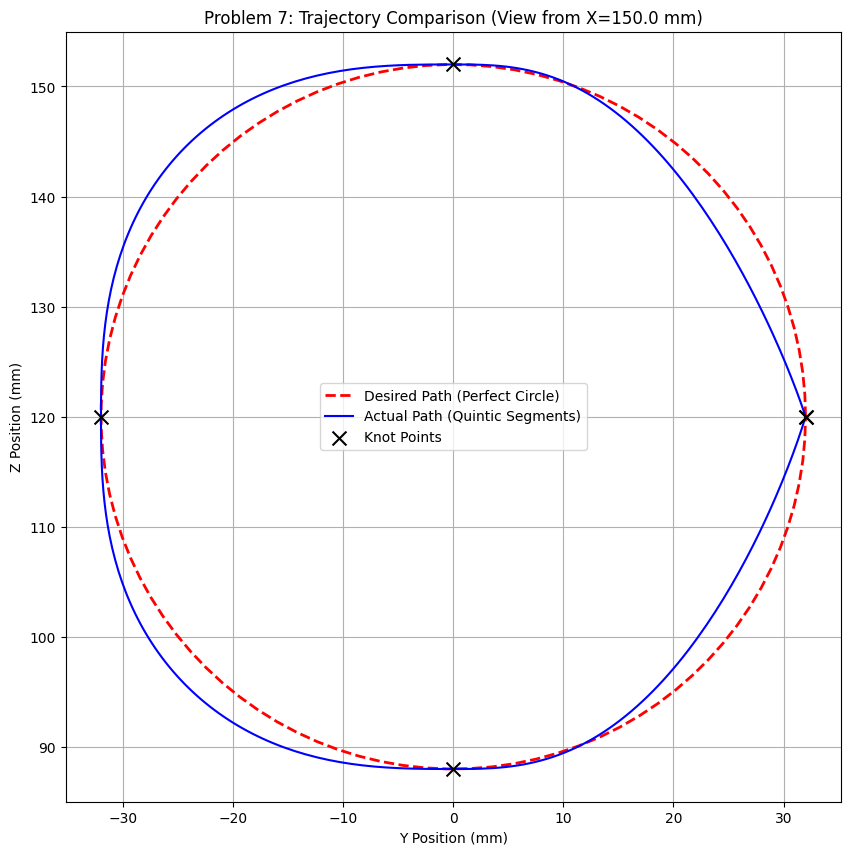

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 


print("--- Problem 7: ---")

# === Define functions to evaluate the polynomials ===

def quintic_poly_pos(coeffs, t):
    """Calculates position q(t) from a 6-coeff vector 'a' and time 't'."""
    # coeffs = [a0, a1, a2, a3, a4, a5]
    # Create the time vector [1, t, t^2, t^3, t^4, t^5]
    t_vec = np.array([t**i for i in range(6)])
    return np.dot(coeffs, t_vec)

def get_q_at_global_time(t_global, all_coeffs):
    """
    Takes a global time (0-8s) and the coefficient dictionary,
    and returns the joint vector q = [q1, q2, q3, q4] at that time.
    """
    # Determine which segment (A, B, C, D) and the local time (0-2s)
    if 0 <= t_global < 2.0:
        segment_name = 'A'
        t_local = t_global
    elif 2.0 <= t_global < 4.0:
        segment_name = 'B'
        t_local = t_global - 2.0
    elif 4.0 <= t_global < 6.0:
        segment_name = 'C'
        t_local = t_global - 4.0
    else: # 6.0 <= t_global <= 8.0
        segment_name = 'D'
        t_local = t_global - 6.0
        # handle the t=8.0 case (which is t_local = 2.0 for segment D)
        if t_global >= 8.0:
            t_local = 2.0 
            
    # Get the 4x6 coefficient matrix for this segment
    segment_coeffs = all_coeffs[segment_name]
    
    # Calculate position for all 4 joints
    q = np.zeros(4)
    for i in range(4):
        q[i] = quintic_poly_pos(segment_coeffs[i, :], t_local)
        
    return q

# === Generate the "Actual Path" data ===
# We will simulate the 8-second trajectory
num_points = 400 # 50 points per second
t_global_vec = np.linspace(0, 8, num_points)
actual_path_xyz = []

print(f"Generating 'Actual Path' from {num_points} time points...")
for t in t_global_vec:
    # 1. Find joint angles q(t) from the polynomials
    q_t = get_q_at_global_time(t, all_coeffs)
    
    # 2. Find stylus position (x,y,z) using Forward Kinematics
    # We substitute the numerical q(t) into our symbolic t0_4 matrix
    subs_dict = {
        theta1: q_t[0],
        theta2: q_t[1],
        theta3: q_t[2],
        theta4: q_t[3]
    }
    T_numeric = t0_4.evalf(subs=subs_dict)
    
    # Extract the x, y, z position (last column)
    xyz_t = [float(T_numeric[0, 3]), float(T_numeric[1, 3]), float(T_numeric[2, 3])]
    actual_path_xyz.append(xyz_t)

# Convert list of points to a NumPy array for easy slicing
actual_path_xyz = np.array(actual_path_xyz)
y_actual = actual_path_xyz[:, 1]
z_actual = actual_path_xyz[:, 2]

# === Step 3: Generate the "Desired Path" data (the perfect circle) ===
print("Generating 'Desired Path' (perfect circle)...")
phi_vec = np.linspace(0, 2 * np.pi, 100)
x_desired = pc_p3[0] + np.zeros(phi_vec.shape) # Array of 150s
y_desired = pc_p3[1] + R_p3 * np.cos(phi_vec)
z_desired = pc_p3[2] + R_p3 * np.sin(phi_vec)

# === Step 4: Get (x,y,z) coordinates of the 5 Knot Points ===
print("Calculating (x,y,z) of the 5 knot points...")
knot_points_xyz = []
for q_knot in q_knots:
    # Use the same FK method as in the loop for consistency
    subs_dict = {
        theta1: q_knot[0],
        theta2: q_knot[1],
        theta3: q_knot[2],
        theta4: q_knot[3]
    }
    T_numeric = t0_4.evalf(subs=subs_dict)
    knot_points_xyz.append([float(T_numeric[0, 3]), float(T_numeric[1, 3]), float(T_numeric[2, 3])])

knot_points_xyz = np.array(knot_points_xyz)
y_knots = knot_points_xyz[:, 1]
z_knots = knot_points_xyz[:, 2]

# === Step 5: Plot and Compare ===
print("Generating plot...")
plt.figure(figsize=(10, 10))
plt.plot(y_desired, z_desired, 'r--', label='Desired Path (Perfect Circle)', linewidth=2)
plt.plot(y_actual, z_actual, 'b-', label='Actual Path (Quintic Segments)')
plt.scatter(y_knots, z_knots, marker='x', c='black', s=100, label='Knot Points', zorder=10) # zorder=10 makes them plot on top

plt.xlabel('Y Position (mm)')
plt.ylabel('Z Position (mm)')
plt.title(f'Problem 7: Trajectory Comparison (View from X={pc_p3[0]} mm)')
plt.legend()
plt.grid(True)
plt.axis('equal') # This ensures the plot isn't stretched; a circle looks like a circle.
plt.show()

